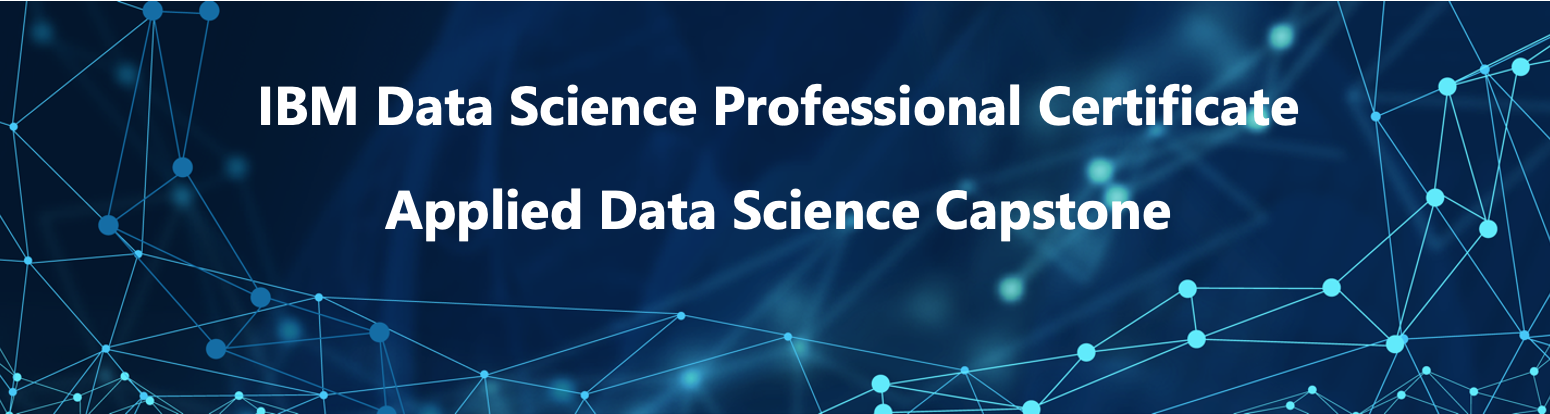

# Final Capstone Project - Car Accident Severity

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results and Evaluations](#results)
* [Discussion](#discussion)
* [Conclusion](#conclusion)

# Introduction <a name="introduction"></a>

The goal of this project is the **prediction** of **road accident severity**. This study utilized a **dataset** consisting of **221525** recorded accidents and **40** attributes in **Seattle City** in Washington State by Seattle Department of Transportation (SDOT).

Analysed and **build balanced machine learning models** were developed by applying **prediction methods**. One of the important indicators for measuring the efficiency of service provision in road network systems of each country is the number of road accidents. The main purpose of the study aims analysis of injury accident and fatal accident to predict the accident severity.

Its measurement comprehensively considers statistical relationship among variables such as average speed on road section, average traffic volume per day, period of time, weather conditions, physical characteristics of accident area, and causes of accident.

# Data <a name="introduction"></a>

In order to achieve a successful project, it is important to use a manageable dataset to analyze it. For this purpose, all data must be available and also to achieve the desired result, with high accuracy and efficiency, its size should be large enough, and of course all pre-processing conditions, including data cleaning and normalization, should be considered. This dataset includes all types of collisions. Collisions will display at the intersection or mid-block of a segment. (Timeframe: 2004 to Present). The dataset is available in Comma Separated Value (CSV) format. For further information you can visit the official website of Seattle Department of Transportation  through the following link. [(Click Here)](https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0/data)

The feature selection process in many cases enhances the performance of the machine learning model. This process involves reducing the number of input variables to reduce computational costs in developing a predictive model. In addition, the selection of features includes the selection of the most important and relevant features. In this study, the following features are key features in predicting the severity of accidents, which will be fully discussed in the Methodology section.
 * **WEATHER**: *A description of the weather conditions during the time of the collision.*
 * **ROADCOND**: *The condition of the road during the collision.*
 * **LIGHTCOND**: *The light conditions during the collision.*

Eventually, the Target or Dependent variable will be **'SEVERITYCODE'**. It’s used to measure the accident severity. The following features play an important role in measuring the severity of accidents. **'WEATHER**', **'ROADCOND'** and **'LIGHTCOND'**.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import time
import seaborn as sns
from tqdm.auto import tqdm, trange

In [2]:
#Read the CSV file
df = pd.read_csv("Collisions.csv")

df.shape
print("Size of the Original Data Frame: "+str(df.shape[0])+' * '+str(df.shape[1]))

Size of the Original Data Frame: 221525 * 40


/Users/omid/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
pd.set_option('display.max_columns', None)
df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.344896,47.717173,1,1003,1003,3503158,Matched,Block,NaN,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,,NaN,2,Injury Collision,Cycles,2,0,1,1,1,0,0,2013/03/14 00:00:00+00,3/14/2013 5:30:00 PM,Driveway Junction,18.0,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",NaN,N,Clear,Dry,Daylight,Y,NaN,NaN,45,Vehicle - Pedalcyclist,15057,0,N
1,-122.376467,47.543774,2,56200,56200,1795087,Matched,Block,NaN,35TH AVE SW BETWEEN SW MORGAN ST AND SW HOLLY ST,NaN,NaN,2,Injury Collision,Pedestrian,7,1,0,1,1,0,0,2006/01/15 00:00:00+00,1/15/2006 5:35:00 PM,Mid-Block (not related to intersection),24.0,MOTOR VEHCILE STRUCK PEDESTRIAN,NaN,0,Overcast,Dry,Dark - Street Lights On,NaN,6015003.0,NaN,0,Vehicle going straight hits pedestrian,0,0,N
2,-122.360735,47.701487,3,327037,328537,E979380,Matched,Intersection,37122.0,3RD AVE NW AND NW 100TH ST,,NaN,1,Property Damage Only Collision,Angles,2,0,0,2,0,0,0,2019/09/09 00:00:00+00,9/9/2019 3:32:00 PM,At Intersection (intersection related),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
3,-122.297415,47.599233,4,327278,328778,E996362,Unmatched,Intersection,30602.0,M L KING JR WAY S AND S JACKSON ST,,NaN,1,Property Damage Only Collision,NaN,2,0,0,0,0,0,0,2019/12/19 00:00:00+00,12/19/2019,At Intersection (intersection related),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
4,-122.368001,47.653585,5,1248,1248,3645424,Unmatched,Block,NaN,W EWING ST BETWEEN 6TH AVE W AND W EWING PL,,NaN,0,Unknown,NaN,1,0,0,0,0,0,0,2013/03/27 00:00:00+00,3/27/2013,Mid-Block (not related to intersection),0.0,NOT ENOUGH INFORMATION / NOT APPLICABLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N


## Data Cleaning - Missing target variable

In [4]:
#Remove Missing target variable with value = "Unknown"
print(df["SEVERITYDESC"].value_counts())

todrop = df["SEVERITYDESC"] == 'Unknown'
print("\n"+str(todrop.values.sum())+" Records Deleted Successfully.")
df.drop(df.index[todrop], inplace=True)

#Re-index dataframe
df.reset_index(inplace=True)

Property Damage Only Collision    137671
Injury Collision                   58783
Unknown                            21616
Serious Injury Collision            3105
Fatality Collision                   350
Name: SEVERITYDESC, dtype: int64

21616 Records Deleted Successfully.


## Data Cleaning - Redundant and useless data

In [5]:
if 'OBJECTID' in df:
    del df["OBJECTID"]
if 'COLDETKEY' in df:
    del df["COLDETKEY"]
if 'REPORTNO' in df:
    del df["REPORTNO"]
if 'STATUS' in df:
    del df["STATUS"]
if 'EXCEPTRSNCODE' in df:
    del df["EXCEPTRSNCODE"]
if 'EXCEPTRSNDESC' in df:
    del df["EXCEPTRSNDESC"]
if 'INCDATE' in df:
    del df["INCDATE"]
if 'SDOTCOLNUM' in df:
    del df["SDOTCOLNUM"]
if 'STCOLCODE' in df:
    del df["STCOLCODE"]

In [6]:
#Remove the value of key features with value = "Unknown"
wdrop = df["WEATHER"] == 'Unknown'
noweather = wdrop.values.sum()

rdrop = df["ROADCOND"] == "Unknown"
noroad = rdrop.values.sum()

ldrop = df["LIGHTCOND"] == "Unknown"
nolight = ldrop.values.sum()

#Collate these and remove
df["TODROP"] = 0
count_noweather = 0
count_noinfo = 0
for i in range(0,len(wdrop)):
    if wdrop[i] == True or rdrop[i] == True or ldrop[i] == True:
        df["TODROP"][i] = 1
        
print(""+str(noweather)+" Record with unknown conditions removed.")
print(""+str(noroad)+" Record with unknown conditions removed.")
print(""+str(nolight)+" Record with unknown conditions removed.")

print("\nSize of the Data Frame: "+str(df.shape[0])+" * "+str(df.shape[1]))

df.shape
todrop = df["TODROP"] == 1
df.drop(df.index[todrop], inplace=True)

#Re-index Data Frame
df.reset_index(inplace=True)

if 'TODROP' in df:
    del df["TODROP"]
    del df["level_0"]
    del df["index"]

<ipython-input-6-58449fe294cf>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TODROP"][i] = 1


15131 Record with unknown conditions removed.
15139 Record with unknown conditions removed.
13532 Record with unknown conditions removed.

Size of the Data Frame: 199909 * 34


## Data Cleaning - Convert categorical variable to numeric

In [7]:
#Convert categorical variable to numeric
print(df["SEVERITYCODE"].value_counts())


for i in range(0,len(df["SEVERITYCODE"])):
    if df["SEVERITYCODE"][i] == '2b':
        df["SEVERITYCODE"][i] = 3

    if df["SEVERITYCODE"][i] == '3':
        df["SEVERITYCODE"][i] = 4

        
df = df.astype({'SEVERITYCODE':np.int})
print(df["SEVERITYCODE"].value_counts())

1     119933
2      57571
2b      3051
3        347
Name: SEVERITYCODE, dtype: int64


<ipython-input-7-62294c866fb0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SEVERITYCODE"][i] = 4
<ipython-input-7-62294c866fb0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SEVERITYCODE"][i] = 3


1    119933
2     57571
3      3051
4       347
Name: SEVERITYCODE, dtype: int64


In [8]:
#Convert categorical variable to numeric
df["SPEEDING"].replace(np.nan, 0, inplace=True)
df["SPEEDING"].replace("Y", 1, inplace=True)

df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)
df["INATTENTIONIND"].replace("Y", 1, inplace=True)

df["UNDERINFL"].replace(np.nan, 0, inplace=True)
df["UNDERINFL"].replace('N', 0, inplace=True)
df["UNDERINFL"].replace('0', 0, inplace=True)
df["UNDERINFL"].replace('1', 1, inplace=True)
df["UNDERINFL"].replace("Y", 1, inplace=True)

df["PEDROWNOTGRNT"].replace(np.nan, 0, inplace=True)
df["PEDROWNOTGRNT"].replace("Y", 1, inplace=True)

df["HITPARKEDCAR"].replace("N", 0, inplace=True)
df["HITPARKEDCAR"].replace(np.nan, 0, inplace=True)
df["HITPARKEDCAR"].replace("Y", 1, inplace=True)

In [9]:
#One Hot Encoding
wdummies = pd.get_dummies(df["WEATHER"])
ldummies = pd.get_dummies(df["LIGHTCOND"])
rdummies = pd.get_dummies(df["ROADCOND"])
adddummies = pd.get_dummies(df["ADDRTYPE"])

wdummies.rename(columns={"Other": "Other weather"}, inplace=True)
ldummies.rename(columns={"Other": "Other light"}, inplace=True)
rdummies.rename(columns={"Other": "Other roadcond"}, inplace=True)

coldummies = pd.get_dummies(df["SDOT_COLCODE"])
columns = coldummies.columns
for col in columns:
    coldummies = coldummies.rename(columns={col: 'SDOT_COLCODE_'+str(col)})

#Merging with existing Dara Frame
df = df.join(wdummies)
df = df.join(ldummies)
df = df.join(rdummies)
df = df.join(adddummies)
df = df.join(coldummies)

In [10]:
#Number of NaNs value in Data Frame
print(df.isnull().sum(axis=0))

X                      4037
Y                      4037
INCKEY                    0
ADDRTYPE                844
INTKEY               115543
                      ...  
SDOT_COLCODE_64.0         0
SDOT_COLCODE_66.0         0
SDOT_COLCODE_68.0         0
SDOT_COLCODE_69.0         0
SDOT_COLCODE_87.0         0
Length: 102, dtype: int64


In [11]:
#Removing NaNs Values
df["ST_COLCODE"].fillna(' ', inplace=True)

todrop = df["ST_COLCODE"] == ' '

df["TODROP"] = 0
for i in range(0,len(todrop)):
    if todrop[i] == True:
        df["TODROP"][i] = 1

print(""+str(df["TODROP"].values.sum())+" Records with NaNs Value Removed Successfully.")
        
todrop = df["TODROP"] == 1
df.drop(df.index[todrop], inplace=True)

#Re-index Data Frame
df.reset_index(inplace=True)

if 'TODROP' in df:
    del df["TODROP"]
    del df["index"]

#Cast from 'object' to 'int'
df = df.astype({'ST_COLCODE':np.int64})
    

df.shape
print("\nCurrently, Size of the Data Frame is: "+str(df.shape[0])+' * '+str(df.shape[1]))

<ipython-input-11-c0e49ce9afca>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TODROP"][i] = 1


4695 Records with NaNs Value Removed Successfully.

Currently, Size of the Data Frame is: 176207 * 102


In [12]:
#Removing NaNs Values
df["NOT_HAS_COORDS"] = df["X"].isnull()
count = 0
for i in range(0,len(df["X"])):
    if df["NOT_HAS_COORDS"][i] == True:
        if df["INTKEY"][i] > 0:
            #Find other accidents which share the same INTKEY
            matched_intersections = df.loc[df["INTKEY"] == df["INTKEY"][i]]
            #Do any of these have the required X,Y data?
            with_geodata = matched_intersections["X"].count()
            if with_geodata > 0:
                matched_intersections.head()
                count += 1

if "NOT_HAS_COORDS" in df:
    del df["NOT_HAS_COORDS"]

In [13]:
#Removing NaNs Values
df["X"].fillna(-999, inplace=True)

todrop = df["X"] == -999

df["TODROP"] = 0
for i in range(0,len(todrop)):
    if todrop[i] == True:
        df["TODROP"][i] = 1
        
print(""+str(df["TODROP"].values.sum())+" Records with NaNs Value Removed Successfully")

todrop = df["TODROP"] == 1
df.drop(df.index[todrop], inplace=True)

#Re-index Data Frame
df.reset_index(inplace=True)

if 'TODROP' in df:
    del df["TODROP"]
    del df["index"]

df.shape
print("\nCurrently, Size of the Data Frame is: "+str(df.shape[0])+' * '+str(df.shape[1]))

<ipython-input-13-d10c1adb3a59>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TODROP"][i] = 1


3890 Records with NaNs Value Removed Successfully

Currently, Size of the Data Frame is: 172317 * 102


In [14]:
#Generate a new copy of Data Frame for build a model
new_df = df.copy()
if 'INCKEY' in df:
    del new_df["INCKEY"]
    del new_df["INTKEY"]
    del new_df["ADDRTYPE"]
    del new_df["LOCATION"]
    del new_df["SEVERITYDESC"]
    del new_df["COLLISIONTYPE"]
    del new_df["INCDTTM"]
    del new_df["JUNCTIONTYPE"]
    del new_df["SDOT_COLDESC"]

In [15]:
print("Size of the Data Frame after Pre-processing is:\n"+str(new_df.shape))

Size of the Data Frame after Pre-processing is:
(172317, 93)


## Data Exploration

In [16]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter

mpl.style.use('ggplot')


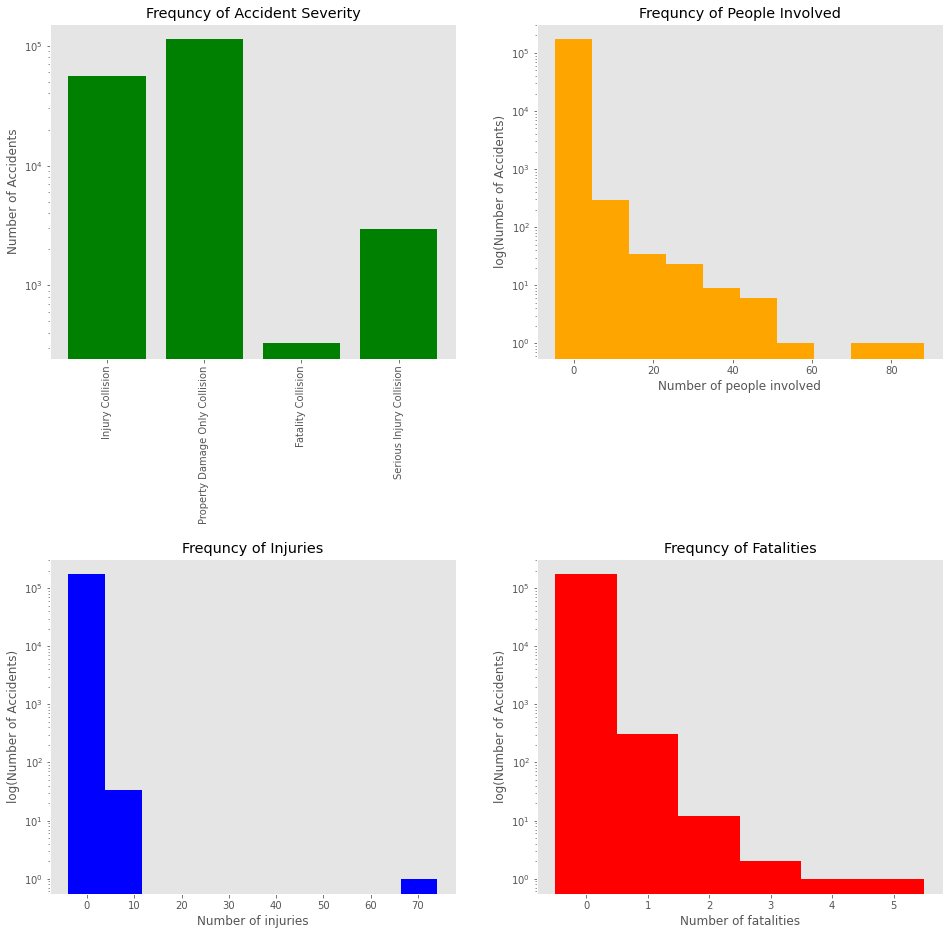

In [38]:
#Visualize the accident information
plt.rcParams["figure.figsize"] = (16,16)

#Accident Severity
plt.subplot(2,2,1)
freqs = Counter(df["SEVERITYDESC"])
xvals = range(len(freqs.values()))
plt.title("Frequncy of Accident Severity")
plt.ylabel("Number of Accidents")
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='green')
plt.xticks(xvals, freqs.keys(), rotation='vertical')
plt.yscale('log')

#Number of people involved
plt.subplot(2,2,2)
freqs = Counter(df["PERSONCOUNT"])
xvals = range(len(freqs.values()))
plt.title("Frequncy of People Involved")
plt.xlabel("Number of people involved")
plt.ylabel("log(Number of Accidents)")
plt.grid(b=None)
plt.hist(df["PERSONCOUNT"], align='left', color='orange')
plt.yscale('log')

#Number of injuries
plt.subplot(2,2,3)
freqs = Counter(df["INJURIES"])
xvals = range(len(freqs.values()))
plt.title("Frequncy of Injuries")
plt.xlabel("Number of injuries")
plt.ylabel("log(Number of Accidents)")
plt.grid(b=None)
plt.hist(df["INJURIES"], align='left', color='blue')
plt.yscale('log')

#Number of fatalities per accident
plt.subplot(2,2,4)
freqs = Counter(df["FATALITIES"])
xvals = range(len(freqs.values()))
plt.title("Frequncy of Fatalities")
plt.xlabel("Number of fatalities")
plt.ylabel("log(Number of Accidents)")
plt.grid(b=None)
plt.hist(df["FATALITIES"], bins=[0,1,2,3,4,5,6], align='left', color='red')
plt.yscale('log')

plt.subplots_adjust(hspace=0.6)

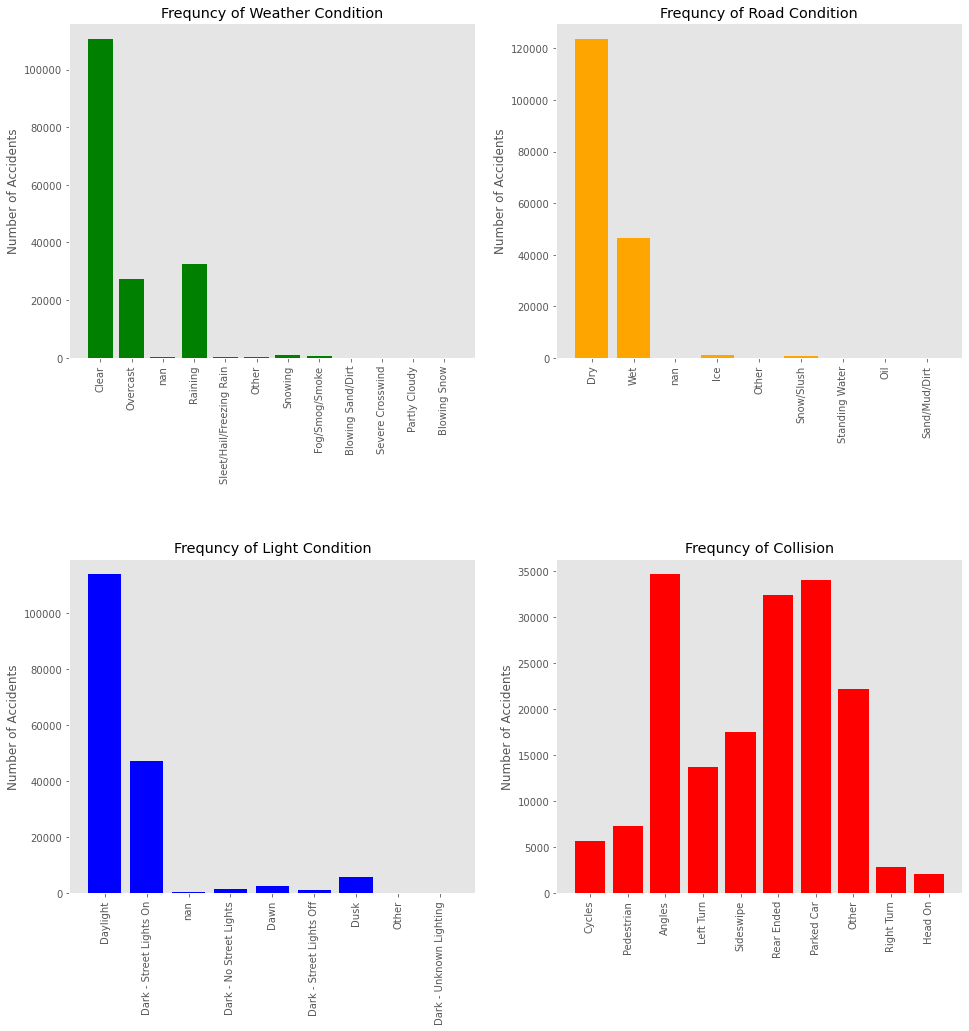

In [18]:
plt.rcParams["figure.figsize"] = (16,16)

#Weather conditions
plt.subplot(2,2,1)
freqs = Counter(df["WEATHER"])
xvals = range(len(freqs.values()))
plt.title("Frequncy of Weather Condition")
plt.ylabel("Number of Accidents")
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='green')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

#Road conditions
plt.subplot(2,2,2)
freqs = Counter(df["ROADCOND"])
xvals = range(len(freqs.values()))
plt.title("Frequncy of Road Condition")
plt.ylabel("Number of Accidents")
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='orange')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

#Light conditions
plt.subplot(2,2,3)
freqs = Counter(df["LIGHTCOND"])
xvals = range(len(freqs.values()))
plt.title("Frequncy of Light Condition")
plt.ylabel("Number of Accidents")
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='blue')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

#ADDRTYPE
plt.subplot(2,2,4)
freqs = Counter(df["COLLISIONTYPE"])
xvals = range(len(freqs.values()))
plt.title("Frequncy of Collision")
plt.ylabel("Number of Accidents")
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='red')
plt.xticks(xvals, freqs.keys(), rotation='vertical')
plt.subplots_adjust(hspace=0.6)

## Balancing Dataset

In [19]:
from sklearn.utils import resample

#Resample Data to balancing the Dataset 
rs_data = new_df.sample(frac=1, random_state=4)

c1 = rs_data.loc[rs_data["SEVERITYCODE"] == 1]
c2 = rs_data.loc[rs_data["SEVERITYCODE"] == 2]
c3 = rs_data.loc[rs_data["SEVERITYCODE"] == 3]
c4 = rs_data.loc[rs_data["SEVERITYCODE"] == 4]

c1_rs = rs_data.loc[rs_data["SEVERITYCODE"] == 1].sample(n=len(c4), random_state=42)
c2_rs = rs_data.loc[rs_data["SEVERITYCODE"] == 2].sample(n=len(c4), random_state=42)
c3_rs = rs_data.loc[rs_data["SEVERITYCODE"] == 3].sample(n=len(c4), random_state=42)
c4_rs = c4

#Concatinating the Data Frames
resampled_df = pd.concat([c1_rs, c2_rs, c3_rs, c4_rs])

cols = resampled_df.columns[resampled_df.nunique() <= 1]

for col in cols:
    if col in resampled_df:
        del resampled_df[col]
        
print(resampled_df.shape)


(1312, 70)


In [20]:
#Final Tuning of Data Frame
final_df = resampled_df.drop(["SEVERITYCODE","INJURIES","SERIOUSINJURIES","FATALITIES",
                             "SEGLANEKEY", "CROSSWALKKEY", "WEATHER", "ROADCOND", "LIGHTCOND",
                             "ST_COLDESC", "PERSONCOUNT", "SDOT_COLCODE", "ST_COLCODE", "HITPARKEDCAR"], axis=1)

final_df.head()

,X,Y,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,Clear,Fog/Smog/Smoke,Other weather,Overcast,Partly Cloudy,Raining,Severe Crosswind,Snowing,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Dry,Ice,Snow/Slush,Standing Water,Wet,Block,Intersection,SDOT_COLCODE_0.0,SDOT_COLCODE_11.0,SDOT_COLCODE_12.0,SDOT_COLCODE_13.0,SDOT_COLCODE_14.0,SDOT_COLCODE_15.0,SDOT_COLCODE_16.0,SDOT_COLCODE_18.0,SDOT_COLCODE_21.0,SDOT_COLCODE_22.0,SDOT_COLCODE_23.0,SDOT_COLCODE_24.0,SDOT_COLCODE_25.0,SDOT_COLCODE_26.0,SDOT_COLCODE_27.0,SDOT_COLCODE_28.0,SDOT_COLCODE_29.0,SDOT_COLCODE_33.0,SDOT_COLCODE_44.0,SDOT_COLCODE_51.0,SDOT_COLCODE_54.0,SDOT_COLCODE_55.0,SDOT_COLCODE_56.0,SDOT_COLCODE_64.0,SDOT_COLCODE_69.0
165384,-122.355512,47.713252,0,0,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26729,-122.322398,47.608017,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32993,-122.372748,47.704270,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4991,-122.343493,47.618556,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
121984,-122.347802,47.734129,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
print("Size of the Tuned Data Frame:")
print(final_df.shape)

Size of the Tuned Data Frame:
(1312, 56)


## Normalising Data

In [22]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(final_df).transform(final_df)

#Binarise SEVERITY code
Y = resampled_df["SEVERITYCODE"].apply(lambda x: 1 if (x>2)  else 0)

## Train-Test Split for Evaluating Machine Learning Algorithms

In [23]:
# We split X and Y into train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (918, 56) (918,)
Test set: (394, 56) (394,)


# Methodology

## Classification

To build the model, three different algorithms are used in this project including supervised machine learning techniques. These algorithms are listed below;

 * Decision Tree
 * K-Nearest Neighbor (KNN)
 * Logistic Regression

## Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy")#, max_depth = 8)
DT_model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [25]:
#Prediction
DT_yhat = DT_model.predict(X_test)

In [26]:
#Model evaluation
from sklearn import metrics
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix

print("Accuracy of Decision Tree model:")
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, DT_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, DT_yhat))
print("Jaccard index: %.2f" % jaccard_score(Y_test, DT_yhat))
print("F1-score: %.2f" % f1_score(Y_test, DT_yhat, average='weighted') )
print("R2-score: %.2f" % r2_score(DT_yhat , Y_test) )
print(classification_report(Y_test, DT_yhat))

Accuracy of Decision Tree model:
Train set Accuracy:  1.0
Test set Accuracy:  0.6700507614213198
Jaccard index: 0.52
F1-score: 0.67
R2-score: -0.33
              precision    recall  f1-score   support

           0       0.67      0.64      0.65       193
           1       0.67      0.70      0.68       201

    accuracy                           0.67       394
   macro avg       0.67      0.67      0.67       394
weighted avg       0.67      0.67      0.67       394



In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, inax,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix, without Normalization')

    print(cm)

    plt.grid(b=None)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(ax=inax)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if i == 0:
            ipos = i+0.25
        else:
            ipos = i-0.25
        plt.text(j, ipos, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                fontsize=16)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [28]:
cnf_matrix = confusion_matrix(Y_test, DT_yhat, labels=[1,0])
np.set_printoptions(precision=2)

Normalized Confusion Matrix
[[0.7  0.3 ]
 [0.36 0.64]]


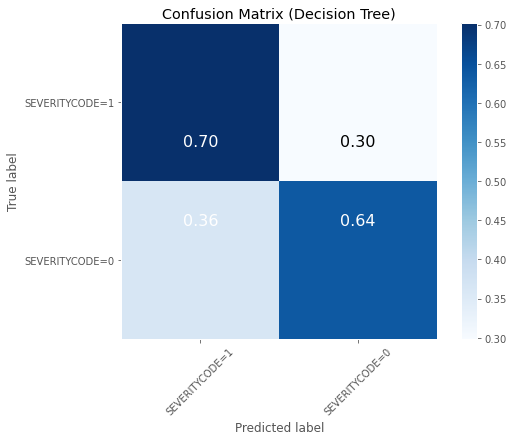

In [29]:
plt.rcParams["figure.figsize"] = (8,6)
plot_confusion_matrix(cnf_matrix, classes=['SEVERITYCODE=1','SEVERITYCODE=0'], inax=plt.gca(), normalize= True,  title='Confusion Matrix (Decision Tree)', cmap=plt.cm.Blues)

## K-Nearest Neighbor (KNN)

Maximum Accuracy: 0.733502538071066 at K = 4


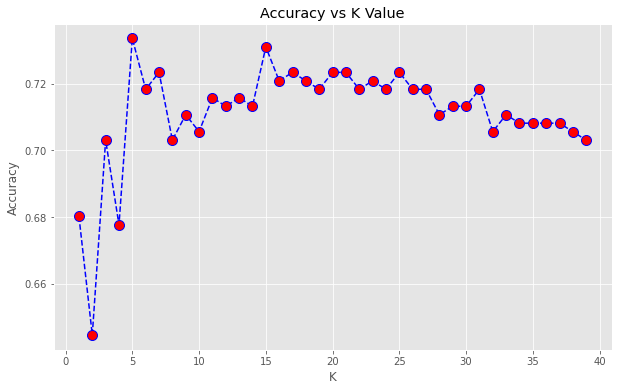

In [30]:
from sklearn.neighbors import KNeighborsClassifier

acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,Y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(Y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum Accuracy:",max(acc),"at K =",acc.index(max(acc)))

In [31]:
#Running the model with the best K  
print("Best fitting with","K =",acc.index(max(acc)))

kNN_model = KNeighborsClassifier(n_neighbors=4).fit(X_train,Y_train)
kNN_yhat = kNN_model.predict(X_test)  
kNN_model

Best fitting with K = 4


KNeighborsClassifier(n_neighbors=4)

In [32]:
from sklearn import metrics
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix


#Model evaluation
print("Accuracy of kNN model:")
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, kNN_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, kNN_yhat))
print("Jaccard index: %.2f" % jaccard_score(Y_test, kNN_yhat))
print("F1-score: %.2f" % f1_score(Y_test, kNN_yhat, average='weighted') )
print("R2-score: %.2f" % r2_score(kNN_yhat , Y_test) )
print(classification_report(Y_test, kNN_yhat))

Accuracy of kNN model:
Train set Accuracy:  0.7984749455337691
Test set Accuracy:  0.6776649746192893
Jaccard index: 0.46
F1-score: 0.67
R2-score: -0.39
              precision    recall  f1-score   support

           0       0.63      0.82      0.71       193
           1       0.76      0.54      0.63       201

    accuracy                           0.68       394
   macro avg       0.69      0.68      0.67       394
weighted avg       0.70      0.68      0.67       394



Normalized Confusion Matrix
[[0.54 0.46]
 [0.18 0.82]]


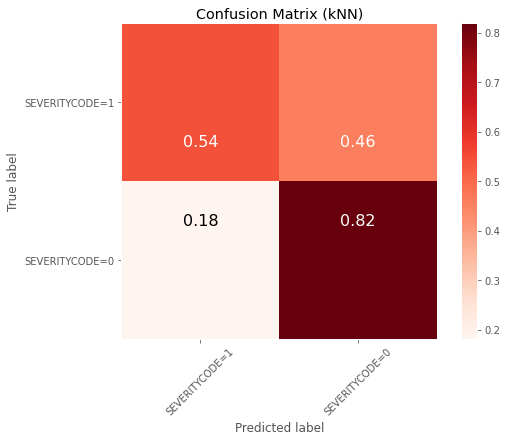

In [33]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, kNN_yhat, labels=[1,0])
np.set_printoptions(precision=2)

plot_confusion_matrix(cnf_matrix, inax=plt.gca(), classes=['SEVERITYCODE=1','SEVERITYCODE=0'],normalize= True,  title='Confusion Matrix (kNN)', cmap=plt.cm.Reds)


## Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,Y_train)

In [35]:
LR_yhat = LR_model.predict(X_test)

In [36]:
#Model evaluation
print("Accuracy of Logistic Regression model:")
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, LR_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, LR_yhat))
print("Jaccard index: %.2f" % jaccard_score(Y_test, LR_yhat))
print("F1-score: %.2f" % f1_score(Y_test, LR_yhat, average='weighted') )
print("R2-score: %.2f" % r2_score(LR_yhat , Y_test) )
print(classification_report(Y_test, LR_yhat))

Accuracy of Logistic Regression model:
Train set Accuracy:  0.7657952069716776
Test set Accuracy:  0.7588832487309645
Jaccard index: 0.61
F1-score: 0.76
R2-score: 0.03
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       193
           1       0.78      0.73      0.75       201

    accuracy                           0.76       394
   macro avg       0.76      0.76      0.76       394
weighted avg       0.76      0.76      0.76       394



Normalized Confusion Matrix
[[0.73 0.27]
 [0.21 0.79]]


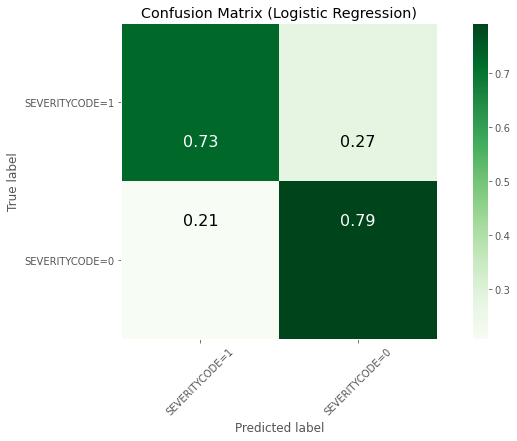

In [37]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, LR_yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.rcParams["figure.figsize"] = (10,6)
plot_confusion_matrix(cnf_matrix, inax=plt.gca(), classes=['SEVERITYCODE=1','SEVERITYCODE=0'],normalize= True,
                      title='Confusion Matrix (Logistic Regression)', cmap=plt.cm.Greens)
